<a href="https://colab.research.google.com/github/albs-br/tcc-machine-vision/blob/main/TCC_teste_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# TCC_teste_1
# v.0.5.0
# Author: André Baptista (andrebaptista.com.br)
print(cv2.__version__) # mostar versão do openCV

4.0.1


In [25]:
#from google.colab import drive
#drive.mount('/content/drive')

In [26]:
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow     # aparentemente só funciona dentro do ambiente Colab
from matplotlib import pyplot as plt

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

In [27]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

In [14]:
input_dir = "C:/TCC_ForaDoOneDrive/Imagens selecionadas - 43/UFPR04/Sunny/2012-12-07/All/"
#input_dir = "C:/TCC_ForaDoOneDrive/Imagens selecionadas - 3800/UFPR04/016/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

if not os.path.exists(features_dir):
    os.makedirs(features_dir)

if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

In [7]:
# # limpar diretórios de saída

# # Features (.brief)
# for f in os.listdir(features_dir):
#     if not f.endswith(".brief"):    #if os.path.isdir(f):
#         continue
#     os.remove(os.path.join(features_dir, f))

# # Cluster (cluster.cluster)
# for f in os.listdir(cluster_dir):
#     if not f.endswith(".cluster"):
#         continue
#     os.remove(os.path.join(cluster_dir, f))

# # Bow (.bow)
# for f in os.listdir(bow_dir):
#     if not f.endswith(".bow"):
#         continue
#     os.remove(os.path.join(bow_dir, f))

Mostrar imagem exemplo:


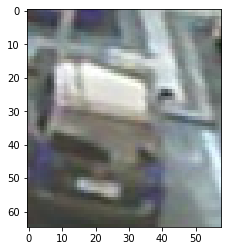

In [15]:
#Mostrar imagem:
# path_teste = input_dir + 'Empty_Cloudy_2012-12-14_16_55_13#016.jpg'
path_teste = input_dir + '2012-12-07_17_12_25#016.jpg'
# img_teste = cv2.imread(path_teste)
img_teste = cv2.imread(path_teste)

#Show the image with matplotlib
plt.imshow(img_teste)
plt.show()

In [ ]:
# Teste HOG descriptor

# Create HOG Descriptor object
hog = cv2.HOGDescriptor()

im = cv2.imread(path_teste, 0) # Grayscale image

# Compute HOG descriptor
h = hog.compute(im)

print('Done')
print(h)

In [17]:
# Teste Dense SIFT descriptor

im = cv2.imread(path_teste, 0) # Grayscale image

# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Provide a list of keypoints in spaces of 5 pixels horizontally and vertically
# Change the step size according to what you want
step_size = 5
kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, img.shape[0], step_size) 
                                    for x in range(0, img.shape[1], step_size)]

# Calculate Dense SIFT feature vector
dense_feat = sift.compute(img, kp)

print('Done')
print(h)

4.0.1


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\opencv_contrib-4.0.1\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [48]:
        # Initiate ORB detector
        # valores default: ORB(int nfeatures=500, float scaleFactor=1.2f, int nlevels=8, int edgeThreshold=31, int firstLevel=0, int WTA_K=2, int scoreType=ORB::HARRIS_SCORE, int patchSize=31)
        orb = cv2.ORB_create(
          nfeatures = 500,                    # The maximum number of features to retain.
          scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
          nlevels = 8,                        # The number of pyramid levels.
          edgeThreshold = 7,                  # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
          firstLevel = 0,                     # It should be 0 in the current implementation.
          WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
          scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
                                              # used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable 
                                              # keypoints, but it is a little faster to compute.
          #scoreType = cv2.ORB_FAST_SCORE,
          patchSize = 7                       # size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered
                                              # by a feature will be larger.
        )

        # Initiate BRIEF extractor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

imagem: 2012-12-07_17_12_25#016.jpg


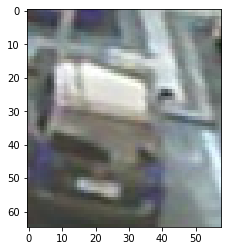

In [ ]:
%%time

#print(os.path.exists(input_dir))

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(input_dir):
    onlyfiles = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print("imagem: " + file)
    
        img_path = join(input_dir, file)

        img = cv2.imread(img_path)

        # mostrar imagem original
        plt.imshow(img)
        plt.show()

        # opcional: redimensiona a imagem
        #img = cv2.resize(
        # img, (160, 160), interpolation=cv2.INTER_CUBIC)
        
        
        
        # Initiate STAR detector
        #star = cv2.xfeatures2d.StarDetector_create()

#         # Initiate ORB detector
#         # valores default: ORB(int nfeatures=500, float scaleFactor=1.2f, int nlevels=8, int edgeThreshold=31, int firstLevel=0, int WTA_K=2, int scoreType=ORB::HARRIS_SCORE, int patchSize=31)
#         orb = cv2.ORB_create(
#           nfeatures = 500,                    # The maximum number of features to retain.
#           scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
#           nlevels = 8,                        # The number of pyramid levels.
#           edgeThreshold = 7,                  # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
#           firstLevel = 0,                     # It should be 0 in the current implementation.
#           WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
#           scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
#                                               # used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable 
#                                               # keypoints, but it is a little faster to compute.
#           #scoreType = cv2.ORB_FAST_SCORE,
#           patchSize = 7                       # size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered
#                                               # by a feature will be larger.
#         )



#         # Initiate BRIEF extractor
#         brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        

        # find the keypoints with STAR
        #kp = star.detect(img, None)

        # find the keypoints with ORB
        # kp = orb.detect(img, None)



        # compute the descriptors with BRIEF
        #kp, feat = brief.compute(img, kp)        

        # compute the descriptors with ORB
        #kp, feat = orb.compute(img, kp)


        # imprimir numero de features encontradas
        print("número de features (keypoints) encontradas: " + str(len(kp)))
        print("formato (keypoints, dimensões): " + str(np.shape(feat)))
        #print(feat)

        # mostrar imagem com os keypoints encontrados
        img2_kp = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=cv2.DrawMatchesFlags_DEFAULT)
        plt.figure()
        plt.imshow(img2_kp)
        plt.show()



        feat_path = join(features_dir, file)

        # store the data as binary data stream
        if len(kp) > 0:
            with open(feat_path + ".brief", "wb") as f:
                pickle.dump(feat.tolist(), f)
        else:
            print("Erro: 0 features encontradas")

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

        print("----------------------------------------")

Criação do vocabulário visual

1. Clusterização

In [8]:
from sklearn.cluster import KMeans
import time

In [9]:
cluster_file = cluster_dir + "cluster.cluster"

In [10]:
# número de clusters
#k = 64
k = 1024

# números de dimensões das features
dim = 32

In [11]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):        
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1        

        if (i % dim) == 0:
            desc += "\n" 

    output_file.write(desc)

In [13]:
%%time
listOfFeat = []

print(os.path.exists(features_dir))

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        #print(file)
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        #print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))
    
t1 = time.time()  
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)  
output_file.close()

print('Terminado salvar .cluster')

True
(291691, 32)
2588.709337234497
Terminado salvar .cluster
Wall time: 43min 11s


2. Bag of Visual Word

In [14]:
%%time

print('start')

# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []    
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)        

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance 
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1                     
        
        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

start
Done
Wall time: 1h 10min 4s


**Busca**

Utilizando um arquivo de BoW de uma das imagens de entrada

In [145]:
%%time
# leitura das imagens do diretório

# img_busca = "/occupied 2012-12-07_17_12_25#016.jpg.brief.bow" # mais semelhante: 18.1 (Occupied)
# img_busca = "/occupied 2012-12-07_18_22_26#016.jpg.brief.bow" # mais semelhante: 10.3 (Occupied)
# img_busca = "/2012-12-07_20_22_28#016.jpg.brief.bow" # mais semelhante: 8.0 (empty)
img_busca = "/2012-12-07_18_02_26#016.jpg.brief.bow" # mais semelhante: 8.9 (empty)

q = np.loadtxt(bow_dir + img_busca)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

2012-12-07_17_32_25#016.jpg.brief.bow: 7.0
2012-12-07_19_52_28#016.jpg.brief.bow: 7.54983443527075
2012-12-07_20_37_29#016.jpg.brief.bow: 7.0710678118654755
2012-12-07_20_27_28#016.jpg.brief.bow: 7.483314773547883
2012-12-07_20_12_28#016.jpg.brief.bow: 7.3484692283495345
2012-12-07_17_52_26#016.jpg.brief.bow: 7.745966692414834
2012-12-07_20_17_28#016.jpg.brief.bow: 7.211102550927978
2012-12-07_20_22_28#016.jpg.brief.bow: 7.3484692283495345
occupied 2012-12-07_17_12_25#016.jpg.brief.bow: 11.224972160321824
2012-12-07_18_37_26#016.jpg.brief.bow: 8.306623862918075
2012-12-07_18_12_26#016.jpg.brief.bow: 8.306623862918075
2012-12-07_18_57_27#016.jpg.brief.bow: 8.06225774829855
2012-12-07_19_42_28#016.jpg.brief.bow: 7.937253933193772
2012-12-07_17_22_25#016.jpg.brief.bow: 7.3484692283495345
2012-12-07_19_37_28#016.jpg.brief.bow: 7.483314773547883
2012-12-07_17_57_26#016.jpg.brief.bow: 7.810249675906654
2012-12-07_17_37_25#016.jpg.brief.bow: 7.874007874011811
2012-12-07_17_17_25#016.jpg.brief

**Utilizando uma nova imagem qualquer**

Calculando features locais da imagem de consulta

In [32]:
search_dir = "C:/TCC_ForaDoOneDrive/Imagens selecionadas/UFPR04/016_Search/"
# q = search_dir + "/content/2012-12-11_17_01_09#016.jpg" # occupied
# q = search_dir + "Occupied_Sunny_2012-12-21_15_30_11#016.jpg"
q = search_dir + "Occupied_Sunny_2012-12-21_15_50_11#016.jpg"
q_feature = q + ".brief"
q_bow = q_feature + ".bow"

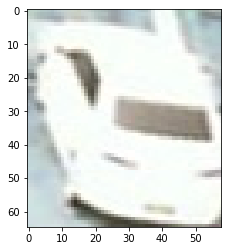

51
(51, 32)


In [33]:
img_search = cv2.imread(q)

#Show the image with matplotlib
plt.imshow(img_search)
plt.show()

# Initiate STAR detector
#star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
#brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
#kp = star.detect(img_search,None)

# find the keypoints with ORB
kp = orb.detect(img_search, None)

# compute the descriptors with BRIEF
#kp, feat = brief.compute(img_search, kp)        

# compute the descriptors with ORB
kp, feat = orb.compute(img_search, kp)

print(len(kp))
print(np.shape(feat))
# print(feat)

# store the data as binary data stream
with open(q_feature, "wb") as f:            
  pickle.dump(feat.tolist(), f)        

Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [34]:
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

with open(q_feature, 'rb') as f:
    # read the data as binary data stream
    feat = pickle.load(f)        

    # inicializa o BoW da imagem com zero para cada dimensão
    bow = [0] * clusters

    # procedimento força bruta para cálculo de distância (euclidean distance)
    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
              result = dist
              centroid_id = id

        bow[centroid_id] += 1                     

    with open(q_bow, 'w') as f:
        for item in bow:
            f.write("%s " % item)

print("Done")

Done


Realizando a consulta

In [35]:
# leitura das imagens do diretório

q = np.loadtxt(q_bow)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

Empty_Cloudy_2012-12-14_13_10_09#016.jpg.brief.bow: 8.774964387392123
Empty_Cloudy_2012-12-14_13_15_09#016.jpg.brief.bow: 8.602325267042627
Empty_Cloudy_2012-12-14_16_15_13#016.jpg.brief.bow: 8.48528137423857
Empty_Cloudy_2012-12-14_16_20_13#016.jpg.brief.bow: 8.831760866327848
Empty_Cloudy_2012-12-14_16_50_13#016.jpg.brief.bow: 8.774964387392123
Empty_Cloudy_2012-12-14_16_55_13#016.jpg.brief.bow: 9.219544457292887
Empty_Cloudy_2012-12-14_17_00_13#016.jpg.brief.bow: 9.591663046625438
Empty_Cloudy_2012-12-14_17_05_14#016.jpg.brief.bow: 9.899494936611665
Empty_Cloudy_2012-12-14_17_10_14#016.jpg.brief.bow: 9.486832980505138
Empty_Cloudy_2012-12-14_17_15_14#016.jpg.brief.bow: 9.273618495495704
Empty_Cloudy_2012-12-14_17_20_14#016.jpg.brief.bow: 9.16515138991168
Empty_Cloudy_2012-12-15_07_30_02#016.jpg.brief.bow: 9.055385138137417
Empty_Cloudy_2012-12-15_07_35_02#016.jpg.brief.bow: 9.0
Empty_Cloudy_2012-12-15_07_40_02#016.jpg.brief.bow: 9.1104335791443
Empty_Cloudy_2012-12-15_07_45_03#016.j

Empty_Cloudy_2012-12-22_12_10_08#016.jpg.brief.bow: 9.0
Empty_Cloudy_2012-12-22_12_15_08#016.jpg.brief.bow: 8.831760866327848
Empty_Cloudy_2012-12-22_12_20_08#016.jpg.brief.bow: 9.055385138137417
Empty_Cloudy_2012-12-22_12_25_08#016.jpg.brief.bow: 9.1104335791443
Empty_Cloudy_2012-12-22_12_30_08#016.jpg.brief.bow: 8.888194417315589
Empty_Cloudy_2012-12-22_12_35_08#016.jpg.brief.bow: 8.94427190999916
Empty_Cloudy_2012-12-22_12_40_08#016.jpg.brief.bow: 8.831760866327848
Empty_Cloudy_2012-12-22_12_45_08#016.jpg.brief.bow: 9.0
Empty_Cloudy_2012-12-22_12_50_09#016.jpg.brief.bow: 8.774964387392123
Empty_Cloudy_2012-12-22_12_55_09#016.jpg.brief.bow: 9.1104335791443
Empty_Cloudy_2012-12-22_13_00_09#016.jpg.brief.bow: 8.888194417315589
Empty_Cloudy_2012-12-22_13_05_09#016.jpg.brief.bow: 8.774964387392123
Empty_Cloudy_2012-12-22_13_10_09#016.jpg.brief.bow: 8.831760866327848
Empty_Cloudy_2012-12-22_13_15_09#016.jpg.brief.bow: 8.660254037844387
Empty_Cloudy_2012-12-22_13_20_09#016.jpg.brief.bow: 9

Empty_Cloudy_2012-12-27_13_05_09#016.jpg.brief.bow: 9.0
Empty_Cloudy_2012-12-27_13_10_09#016.jpg.brief.bow: 8.54400374531753
Empty_Cloudy_2012-12-27_13_15_09#016.jpg.brief.bow: 8.94427190999916
Empty_Cloudy_2012-12-27_13_20_09#016.jpg.brief.bow: 8.602325267042627
Empty_Cloudy_2012-12-27_13_25_09#016.jpg.brief.bow: 8.48528137423857
Empty_Cloudy_2012-12-27_13_30_09#016.jpg.brief.bow: 8.602325267042627
Empty_Cloudy_2012-12-27_13_35_09#016.jpg.brief.bow: 8.660254037844387
Empty_Cloudy_2012-12-27_13_40_09#016.jpg.brief.bow: 9.1104335791443
Empty_Cloudy_2012-12-27_13_45_09#016.jpg.brief.bow: 8.774964387392123
Empty_Cloudy_2012-12-27_13_50_09#016.jpg.brief.bow: 8.426149773176359
Empty_Cloudy_2012-12-27_13_55_09#016.jpg.brief.bow: 8.888194417315589
Empty_Cloudy_2012-12-27_14_00_10#016.jpg.brief.bow: 8.602325267042627
Empty_Cloudy_2012-12-27_14_05_10#016.jpg.brief.bow: 8.717797887081348
Empty_Cloudy_2012-12-27_14_10_10#016.jpg.brief.bow: 9.219544457292887
Empty_Cloudy_2012-12-27_14_15_10#016.jp

Empty_Cloudy_2012-12-28_19_10_15#016.jpg.brief.bow: 8.48528137423857
Empty_Cloudy_2012-12-28_19_15_15#016.jpg.brief.bow: 8.06225774829855
Empty_Cloudy_2012-12-28_19_20_15#016.jpg.brief.bow: 8.306623862918075
Empty_Cloudy_2012-12-28_19_25_15#016.jpg.brief.bow: 8.06225774829855
Empty_Cloudy_2012-12-28_19_30_15#016.jpg.brief.bow: 8.18535277187245
Empty_Cloudy_2012-12-28_19_35_16#016.jpg.brief.bow: 8.06225774829855
Empty_Cloudy_2012-12-28_19_40_16#016.jpg.brief.bow: 7.874007874011811
Empty_Cloudy_2012-12-28_19_45_16#016.jpg.brief.bow: 8.06225774829855
Empty_Cloudy_2012-12-28_19_50_16#016.jpg.brief.bow: 8.06225774829855
Empty_Cloudy_2012-12-28_19_55_16#016.jpg.brief.bow: 8.12403840463596
Empty_Cloudy_2012-12-28_20_00_16#016.jpg.brief.bow: 8.717797887081348
Empty_Cloudy_2012-12-28_20_05_16#016.jpg.brief.bow: 8.246211251235321
Empty_Cloudy_2012-12-28_20_15_16#016.jpg.brief.bow: 7.937253933193772
Empty_Cloudy_2012-12-28_20_20_16#016.jpg.brief.bow: 8.0
Empty_Cloudy_2012-12-28_20_25_17#016.jpg.b

Empty_Cloudy_2013-01-15_20_06_58#016.jpg.brief.bow: 9.643650760992955
Empty_Cloudy_2013-01-15_20_11_58#016.jpg.brief.bow: 9.327379053088816
Empty_Cloudy_2013-01-15_20_16_58#016.jpg.brief.bow: 9.433981132056603
Empty_Cloudy_2013-01-15_20_21_58#016.jpg.brief.bow: 10.0
Empty_Cloudy_2013-01-15_20_26_58#016.jpg.brief.bow: 10.0
Empty_Cloudy_2013-01-15_20_31_58#016.jpg.brief.bow: 9.848857801796104
Empty_Cloudy_2013-01-15_20_36_59#016.jpg.brief.bow: 10.344080432788601
Empty_Cloudy_2013-01-15_20_41_59#016.jpg.brief.bow: 9.695359714832659
Empty_Cloudy_2013-01-16_07_40_03#016.jpg.brief.bow: 10.198039027185569
Empty_Cloudy_2013-01-16_07_45_03#016.jpg.brief.bow: 9.9498743710662
Empty_Cloudy_2013-01-16_07_50_03#016.jpg.brief.bow: 9.848857801796104
Empty_Cloudy_2013-01-16_07_55_03#016.jpg.brief.bow: 9.539392014169456
Empty_Cloudy_2013-01-16_08_00_03#016.jpg.brief.bow: 9.9498743710662
Empty_Cloudy_2013-01-16_08_05_03#016.jpg.brief.bow: 9.695359714832659
Empty_Cloudy_2013-01-16_08_10_03#016.jpg.brief.b

Empty_Cloudy_2013-01-19_09_55_05#016.jpg.brief.bow: 10.816653826391969
Empty_Cloudy_2013-01-19_10_00_05#016.jpg.brief.bow: 11.445523142259598
Empty_Cloudy_2013-01-19_10_05_05#016.jpg.brief.bow: 10.344080432788601
Empty_Cloudy_2013-01-19_10_10_05#016.jpg.brief.bow: 10.954451150103322
Empty_Cloudy_2013-01-19_10_15_05#016.jpg.brief.bow: 10.63014581273465
Empty_Cloudy_2013-01-19_10_20_05#016.jpg.brief.bow: 10.63014581273465
Empty_Cloudy_2013-01-19_10_25_05#016.jpg.brief.bow: 10.099504938362077
Empty_Cloudy_2013-01-19_10_30_05#016.jpg.brief.bow: 10.583005244258363
Empty_Cloudy_2013-01-19_10_35_06#016.jpg.brief.bow: 11.090536506409418
Empty_Cloudy_2013-01-19_10_40_06#016.jpg.brief.bow: 10.862780491200215
Empty_Cloudy_2013-01-19_10_45_06#016.jpg.brief.bow: 10.63014581273465
Empty_Cloudy_2013-01-19_10_50_06#016.jpg.brief.bow: 10.488088481701515
Empty_Cloudy_2013-01-19_10_55_06#016.jpg.brief.bow: 11.0
Empty_Cloudy_2013-01-19_11_00_06#016.jpg.brief.bow: 10.770329614269007
Empty_Cloudy_2013-01-19

Empty_Cloudy_2013-01-19_20_15_16#016.jpg.brief.bow: 11.045361017187261
Empty_Cloudy_2013-01-20_07_55_03#016.jpg.brief.bow: 12.649110640673518
Empty_Cloudy_2013-01-20_08_00_03#016.jpg.brief.bow: 11.874342087037917
Empty_Cloudy_2013-01-20_08_05_03#016.jpg.brief.bow: 12.24744871391589
Empty_Cloudy_2013-01-20_08_10_03#016.jpg.brief.bow: 11.789826122551595
Empty_Cloudy_2013-01-20_08_15_03#016.jpg.brief.bow: 12.328828005937952
Empty_Cloudy_2013-01-20_08_20_03#016.jpg.brief.bow: 12.0
Empty_Cloudy_2013-01-20_08_25_03#016.jpg.brief.bow: 12.328828005937952
Empty_Cloudy_2013-01-20_08_30_03#016.jpg.brief.bow: 12.328828005937952
Empty_Cloudy_2013-01-20_08_35_03#016.jpg.brief.bow: 12.569805089976535
Empty_Cloudy_2013-01-20_08_40_03#016.jpg.brief.bow: 12.083045973594572
Empty_Cloudy_2013-01-20_08_45_04#016.jpg.brief.bow: 11.916375287812984
Empty_Cloudy_2013-01-20_08_50_04#016.jpg.brief.bow: 12.083045973594572
Empty_Cloudy_2013-01-20_08_55_04#016.jpg.brief.bow: 12.328828005937952
Empty_Cloudy_2013-01-

Empty_Cloudy_2013-01-20_18_05_14#016.jpg.brief.bow: 13.152946437965905
Empty_Cloudy_2013-01-20_18_10_14#016.jpg.brief.bow: 12.84523257866513
Empty_Cloudy_2013-01-20_18_15_14#016.jpg.brief.bow: 11.789826122551595
Empty_Cloudy_2013-01-20_18_20_14#016.jpg.brief.bow: 12.449899597988733
Empty_Cloudy_2013-01-20_18_25_14#016.jpg.brief.bow: 11.135528725660043
Empty_Cloudy_2013-01-20_18_30_14#016.jpg.brief.bow: 12.165525060596439
Empty_Cloudy_2013-01-20_18_35_14#016.jpg.brief.bow: 13.228756555322953
Empty_Cloudy_2013-01-20_18_40_14#016.jpg.brief.bow: 11.045361017187261
Empty_Cloudy_2013-01-20_18_45_14#016.jpg.brief.bow: 12.24744871391589
Empty_Cloudy_2013-01-20_18_50_14#016.jpg.brief.bow: 10.723805294763608
Empty_Cloudy_2013-01-20_18_55_14#016.jpg.brief.bow: 11.61895003862225
Empty_Cloudy_2013-01-20_19_00_15#016.jpg.brief.bow: 10.816653826391969
Empty_Cloudy_2013-01-20_19_05_15#016.jpg.brief.bow: 10.908712114635714
Empty_Cloudy_2013-01-20_19_10_15#016.jpg.brief.bow: 11.61895003862225
Empty_Clou

Empty_Rainy_2012-12-26_19_35_16#016.jpg.brief.bow: 8.48528137423857
Empty_Rainy_2012-12-26_19_40_16#016.jpg.brief.bow: 9.1104335791443
Empty_Rainy_2012-12-26_19_45_16#016.jpg.brief.bow: 8.888194417315589
Empty_Rainy_2012-12-26_19_50_16#016.jpg.brief.bow: 8.602325267042627
Empty_Rainy_2012-12-26_19_55_16#016.jpg.brief.bow: 9.0
Empty_Rainy_2012-12-26_20_00_16#016.jpg.brief.bow: 8.774964387392123
Empty_Rainy_2012-12-26_20_05_17#016.jpg.brief.bow: 8.831760866327848
Empty_Rainy_2012-12-26_20_10_17#016.jpg.brief.bow: 8.774964387392123
Empty_Rainy_2012-12-28_08_20_03#016.jpg.brief.bow: 8.18535277187245
Empty_Rainy_2012-12-28_08_25_03#016.jpg.brief.bow: 8.18535277187245
Empty_Rainy_2012-12-28_08_30_03#016.jpg.brief.bow: 8.18535277187245
Empty_Rainy_2012-12-28_08_35_03#016.jpg.brief.bow: 8.18535277187245
Empty_Rainy_2012-12-28_08_40_03#016.jpg.brief.bow: 8.06225774829855
Empty_Rainy_2012-12-28_08_45_03#016.jpg.brief.bow: 8.366600265340756
Empty_Rainy_2012-12-28_08_50_04#016.jpg.brief.bow: 8.185

Empty_Sunny_2012-12-08_08_40_03#016.jpg.brief.bow: 9.433981132056603
Empty_Sunny_2012-12-08_08_45_04#016.jpg.brief.bow: 9.219544457292887
Empty_Sunny_2012-12-08_08_50_04#016.jpg.brief.bow: 9.327379053088816
Empty_Sunny_2012-12-08_08_55_04#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-08_09_00_04#016.jpg.brief.bow: 9.746794344808963
Empty_Sunny_2012-12-08_09_05_04#016.jpg.brief.bow: 9.38083151964686
Empty_Sunny_2012-12-08_09_10_04#016.jpg.brief.bow: 10.099504938362077
Empty_Sunny_2012-12-08_09_15_04#016.jpg.brief.bow: 9.899494936611665
Empty_Sunny_2012-12-08_09_20_04#016.jpg.brief.bow: 10.0
Empty_Sunny_2012-12-08_09_25_04#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-08_09_30_04#016.jpg.brief.bow: 9.591663046625438
Empty_Sunny_2012-12-08_09_35_04#016.jpg.brief.bow: 9.746794344808963
Empty_Sunny_2012-12-08_09_40_05#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-08_09_45_05#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-08_09_50_05#016.jpg.brief.b

Empty_Sunny_2012-12-13_20_45_17#016.jpg.brief.bow: 8.660254037844387
Empty_Sunny_2012-12-16_11_55_07#016.jpg.brief.bow: 9.327379053088816
Empty_Sunny_2012-12-16_12_00_07#016.jpg.brief.bow: 9.695359714832659
Empty_Sunny_2012-12-16_12_05_07#016.jpg.brief.bow: 8.888194417315589
Empty_Sunny_2012-12-16_12_10_07#016.jpg.brief.bow: 9.486832980505138
Empty_Sunny_2012-12-16_12_15_08#016.jpg.brief.bow: 9.16515138991168
Empty_Sunny_2012-12-16_12_20_08#016.jpg.brief.bow: 9.539392014169456
Empty_Sunny_2012-12-16_12_25_08#016.jpg.brief.bow: 9.695359714832659
Empty_Sunny_2012-12-16_12_30_08#016.jpg.brief.bow: 9.38083151964686
Empty_Sunny_2012-12-16_12_35_08#016.jpg.brief.bow: 9.433981132056603
Empty_Sunny_2012-12-16_12_40_08#016.jpg.brief.bow: 9.591663046625438
Empty_Sunny_2012-12-16_12_45_08#016.jpg.brief.bow: 9.539392014169456
Empty_Sunny_2012-12-16_12_50_08#016.jpg.brief.bow: 9.591663046625438
Empty_Sunny_2012-12-16_12_55_08#016.jpg.brief.bow: 9.219544457292887
Empty_Sunny_2012-12-16_13_00_09#016.

Empty_Sunny_2012-12-23_11_35_07#016.jpg.brief.bow: 9.0
Empty_Sunny_2012-12-23_11_40_07#016.jpg.brief.bow: 9.055385138137417
Empty_Sunny_2012-12-23_11_45_07#016.jpg.brief.bow: 9.1104335791443
Empty_Sunny_2012-12-23_11_50_07#016.jpg.brief.bow: 9.539392014169456
Empty_Sunny_2012-12-23_11_55_07#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-23_12_00_07#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-23_12_05_07#016.jpg.brief.bow: 9.16515138991168
Empty_Sunny_2012-12-23_12_10_07#016.jpg.brief.bow: 8.94427190999916
Empty_Sunny_2012-12-23_12_15_08#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-23_12_20_08#016.jpg.brief.bow: 9.746794344808963
Empty_Sunny_2012-12-23_12_25_08#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-23_12_30_08#016.jpg.brief.bow: 9.9498743710662
Empty_Sunny_2012-12-23_12_35_08#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2012-12-23_12_40_08#016.jpg.brief.bow: 10.099504938362077
Empty_Sunny_2012-12-23_12_45_08#016.jpg.brief.bow: 9.

Empty_Sunny_2012-12-24_09_45_04#016.jpg.brief.bow: 9.9498743710662
Empty_Sunny_2012-12-24_09_50_05#016.jpg.brief.bow: 10.04987562112089
Empty_Sunny_2012-12-24_09_55_05#016.jpg.brief.bow: 10.246950765959598
Empty_Sunny_2012-12-24_10_00_05#016.jpg.brief.bow: 9.0
Empty_Sunny_2012-12-24_10_05_05#016.jpg.brief.bow: 8.717797887081348
Empty_Sunny_2012-12-24_10_10_05#016.jpg.brief.bow: 8.94427190999916
Empty_Sunny_2012-12-24_10_15_05#016.jpg.brief.bow: 8.660254037844387
Empty_Sunny_2012-12-24_10_20_05#016.jpg.brief.bow: 8.54400374531753
Empty_Sunny_2012-12-24_10_25_05#016.jpg.brief.bow: 8.94427190999916
Empty_Sunny_2012-12-24_10_30_05#016.jpg.brief.bow: 8.888194417315589
Empty_Sunny_2012-12-24_10_35_05#016.jpg.brief.bow: 8.774964387392123
Empty_Sunny_2012-12-24_10_40_05#016.jpg.brief.bow: 8.717797887081348
Empty_Sunny_2012-12-24_10_45_05#016.jpg.brief.bow: 9.746794344808963
Empty_Sunny_2012-12-24_10_50_05#016.jpg.brief.bow: 8.831760866327848
Empty_Sunny_2012-12-24_10_55_06#016.jpg.brief.bow: 9

Empty_Sunny_2012-12-25_10_25_05#016.jpg.brief.bow: 8.660254037844387
Empty_Sunny_2012-12-25_10_30_05#016.jpg.brief.bow: 8.660254037844387
Empty_Sunny_2012-12-25_10_35_05#016.jpg.brief.bow: 8.660254037844387
Empty_Sunny_2012-12-25_10_40_05#016.jpg.brief.bow: 8.888194417315589
Empty_Sunny_2012-12-25_10_45_05#016.jpg.brief.bow: 8.888194417315589
Empty_Sunny_2012-12-25_10_50_06#016.jpg.brief.bow: 9.1104335791443
Empty_Sunny_2012-12-25_10_55_06#016.jpg.brief.bow: 8.888194417315589
Empty_Sunny_2012-12-25_11_00_06#016.jpg.brief.bow: 8.774964387392123
Empty_Sunny_2012-12-25_11_05_06#016.jpg.brief.bow: 9.797958971132712
Empty_Sunny_2012-12-25_11_10_06#016.jpg.brief.bow: 9.433981132056603
Empty_Sunny_2012-12-25_11_15_06#016.jpg.brief.bow: 8.774964387392123
Empty_Sunny_2012-12-25_11_20_06#016.jpg.brief.bow: 8.717797887081348
Empty_Sunny_2012-12-25_11_25_06#016.jpg.brief.bow: 9.327379053088816
Empty_Sunny_2012-12-25_11_30_06#016.jpg.brief.bow: 8.94427190999916
Empty_Sunny_2012-12-25_11_35_06#016.j

Empty_Sunny_2012-12-25_20_50_16#016.jpg.brief.bow: 9.219544457292887
Empty_Sunny_2012-12-25_20_55_16#016.jpg.brief.bow: 9.848857801796104
Empty_Sunny_2012-12-25_21_00_16#016.jpg.brief.bow: 8.831760866327848
Empty_Sunny_2012-12-26_08_15_03#016.jpg.brief.bow: 9.0
Empty_Sunny_2012-12-26_08_20_03#016.jpg.brief.bow: 9.433981132056603
Empty_Sunny_2012-12-26_08_25_03#016.jpg.brief.bow: 8.94427190999916
Empty_Sunny_2012-12-26_08_30_03#016.jpg.brief.bow: 9.0
Empty_Sunny_2012-12-26_08_35_03#016.jpg.brief.bow: 8.54400374531753
Empty_Sunny_2012-12-26_08_40_04#016.jpg.brief.bow: 8.94427190999916
Empty_Sunny_2012-12-26_08_45_04#016.jpg.brief.bow: 9.1104335791443
Empty_Sunny_2012-12-26_08_50_04#016.jpg.brief.bow: 9.0
Empty_Sunny_2012-12-26_08_55_04#016.jpg.brief.bow: 9.38083151964686
Empty_Sunny_2012-12-26_09_00_04#016.jpg.brief.bow: 8.774964387392123
Empty_Sunny_2012-12-26_09_05_04#016.jpg.brief.bow: 9.219544457292887
Empty_Sunny_2012-12-26_09_10_04#016.jpg.brief.bow: 9.327379053088816
Empty_Sunny_2

Empty_Sunny_2013-01-17_20_15_16#016.jpg.brief.bow: 10.954451150103322
Empty_Sunny_2013-01-17_20_20_17#016.jpg.brief.bow: 10.099504938362077
Empty_Sunny_2013-01-17_20_25_17#016.jpg.brief.bow: 11.090536506409418
Empty_Sunny_2013-01-17_20_30_17#016.jpg.brief.bow: 10.583005244258363
Empty_Sunny_2013-01-17_20_35_17#016.jpg.brief.bow: 11.090536506409418
Empty_Sunny_2013-01-17_20_40_17#016.jpg.brief.bow: 10.63014581273465
Empty_Sunny_2013-01-17_20_45_17#016.jpg.brief.bow: 10.723805294763608
Empty_Sunny_2013-01-17_20_50_17#016.jpg.brief.bow: 10.63014581273465
Empty_Sunny_2013-01-18_07_40_02#016.jpg.brief.bow: 9.695359714832659
Empty_Sunny_2013-01-18_07_45_03#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2013-01-18_07_50_03#016.jpg.brief.bow: 9.643650760992955
Empty_Sunny_2013-01-18_07_55_03#016.jpg.brief.bow: 10.198039027185569
Empty_Sunny_2013-01-18_08_00_03#016.jpg.brief.bow: 9.848857801796104
Empty_Sunny_2013-01-18_08_05_03#016.jpg.brief.bow: 10.04987562112089
Empty_Sunny_2013-01-18_08_1

Occupied_Cloudy_2012-12-12_11_05_06#016.jpg.brief.bow: 14.0
Occupied_Cloudy_2012-12-12_11_10_06#016.jpg.brief.bow: 13.490737563232042
Occupied_Cloudy_2012-12-12_11_15_06#016.jpg.brief.bow: 11.74734012447073
Occupied_Cloudy_2012-12-12_11_20_06#016.jpg.brief.bow: 13.638181696985855
Occupied_Cloudy_2012-12-12_11_25_06#016.jpg.brief.bow: 12.529964086141668
Occupied_Cloudy_2012-12-12_11_30_07#016.jpg.brief.bow: 14.142135623730951
Occupied_Cloudy_2012-12-12_11_35_07#016.jpg.brief.bow: 13.856406460551018
Occupied_Cloudy_2012-12-12_11_40_07#016.jpg.brief.bow: 14.071247279470288
Occupied_Cloudy_2012-12-12_11_45_07#016.jpg.brief.bow: 13.638181696985855
Occupied_Cloudy_2012-12-12_11_50_07#016.jpg.brief.bow: 13.527749258468683
Occupied_Cloudy_2012-12-12_11_55_07#016.jpg.brief.bow: 13.0
Occupied_Cloudy_2012-12-12_12_00_07#016.jpg.brief.bow: 13.341664064126334
Occupied_Cloudy_2012-12-12_12_05_07#016.jpg.brief.bow: 13.038404810405298
Occupied_Cloudy_2012-12-14_09_15_04#016.jpg.brief.bow: 12.727922061

Occupied_Cloudy_2012-12-14_19_45_17#016.jpg.brief.bow: 13.114877048604
Occupied_Cloudy_2012-12-14_19_50_17#016.jpg.brief.bow: 13.379088160259652
Occupied_Cloudy_2012-12-14_19_55_17#016.jpg.brief.bow: 13.228756555322953
Occupied_Cloudy_2012-12-14_20_00_17#016.jpg.brief.bow: 12.68857754044952
Occupied_Cloudy_2012-12-14_20_05_17#016.jpg.brief.bow: 12.84523257866513
Occupied_Cloudy_2012-12-14_20_10_17#016.jpg.brief.bow: 13.45362404707371
Occupied_Cloudy_2012-12-14_20_15_17#016.jpg.brief.bow: 13.711309200802088
Occupied_Cloudy_2012-12-14_20_20_17#016.jpg.brief.bow: 12.884098726725126
Occupied_Cloudy_2012-12-14_20_25_17#016.jpg.brief.bow: 13.601470508735444
Occupied_Cloudy_2012-12-14_20_30_18#016.jpg.brief.bow: 12.767145334803704
Occupied_Cloudy_2012-12-14_20_35_18#016.jpg.brief.bow: 13.96424004376894
Occupied_Cloudy_2012-12-14_20_40_18#016.jpg.brief.bow: 12.884098726725126
Occupied_Cloudy_2012-12-14_20_45_18#016.jpg.brief.bow: 12.84523257866513
Occupied_Cloudy_2012-12-14_20_50_18#016.jpg.br

Occupied_Cloudy_2013-01-16_12_50_08#016.jpg.brief.bow: 14.491376746189438
Occupied_Cloudy_2013-01-16_12_55_08#016.jpg.brief.bow: 13.076696830622021
Occupied_Cloudy_2013-01-16_13_00_08#016.jpg.brief.bow: 14.142135623730951
Occupied_Cloudy_2013-01-16_13_05_09#016.jpg.brief.bow: 13.711309200802088
Occupied_Cloudy_2013-01-16_13_10_09#016.jpg.brief.bow: 14.071247279470288
Occupied_Cloudy_2013-01-16_13_15_09#016.jpg.brief.bow: 13.19090595827292
Occupied_Cloudy_2013-01-16_13_20_09#016.jpg.brief.bow: 14.560219778561036
Occupied_Cloudy_2013-01-16_13_25_09#016.jpg.brief.bow: 12.922847983320086
Occupied_Cloudy_2013-01-16_13_30_09#016.jpg.brief.bow: 14.798648586948742
Occupied_Cloudy_2013-01-16_13_35_09#016.jpg.brief.bow: 14.106735979665885
Occupied_Cloudy_2013-01-16_13_40_09#016.jpg.brief.bow: 14.0
Occupied_Cloudy_2013-01-16_13_45_09#016.jpg.brief.bow: 13.638181696985855
Occupied_Cloudy_2013-01-16_13_50_10#016.jpg.brief.bow: 12.767145334803704
Occupied_Cloudy_2013-01-16_13_55_10#016.jpg.brief.bow

Occupied_Cloudy_2013-01-22_19_20_14#016.jpg.brief.bow: 14.696938456699069
Occupied_Cloudy_2013-01-22_19_25_14#016.jpg.brief.bow: 14.966629547095765
Occupied_Cloudy_2013-01-22_19_30_14#016.jpg.brief.bow: 14.45683229480096
Occupied_Cloudy_2013-01-22_19_35_14#016.jpg.brief.bow: 14.491376746189438
Occupied_Cloudy_2013-01-22_19_40_14#016.jpg.brief.bow: 15.198684153570664
Occupied_Cloudy_2013-01-22_19_45_14#016.jpg.brief.bow: 16.46207763315433
Occupied_Cloudy_2013-01-22_19_50_15#016.jpg.brief.bow: 16.941074346097416
Occupied_Cloudy_2013-01-22_19_55_15#016.jpg.brief.bow: 14.933184523068078
Occupied_Cloudy_2013-01-22_20_00_15#016.jpg.brief.bow: 15.459624833740307
Occupied_Cloudy_2013-01-22_20_05_15#016.jpg.brief.bow: 14.491376746189438
Occupied_Cloudy_2013-01-22_20_10_15#016.jpg.brief.bow: 15.0996688705415
Occupied_Cloudy_2013-01-22_20_15_15#016.jpg.brief.bow: 14.832396974191326
Occupied_Cloudy_2013-01-22_20_20_15#016.jpg.brief.bow: 15.394804318340652
Occupied_Cloudy_2013-01-22_20_25_15#016.jp

Occupied_Rainy_2012-12-19_20_05_16#016.jpg.brief.bow: 13.379088160259652
Occupied_Rainy_2012-12-19_20_10_16#016.jpg.brief.bow: 14.142135623730951
Occupied_Rainy_2012-12-19_20_20_17#016.jpg.brief.bow: 14.7648230602334
Occupied_Rainy_2013-01-16_15_50_12#016.jpg.brief.bow: 14.7648230602334
Occupied_Rainy_2013-01-16_15_55_12#016.jpg.brief.bow: 15.033296378372908
Occupied_Rainy_2013-01-16_16_00_12#016.jpg.brief.bow: 14.2828568570857
Occupied_Rainy_2013-01-16_16_05_12#016.jpg.brief.bow: 14.177446878757825
Occupied_Rainy_2013-01-16_16_10_12#016.jpg.brief.bow: 14.212670403551895
Occupied_Rainy_2013-01-16_16_15_12#016.jpg.brief.bow: 15.394804318340652
Occupied_Rainy_2013-01-16_16_20_12#016.jpg.brief.bow: 16.34013463836819
Occupied_Rainy_2013-01-17_08_25_04#016.jpg.brief.bow: 13.152946437965905
Occupied_Rainy_2013-01-17_08_30_04#016.jpg.brief.bow: 12.041594578792296
Occupied_Rainy_2013-01-17_08_35_04#016.jpg.brief.bow: 13.96424004376894
Occupied_Rainy_2013-01-17_08_40_04#016.jpg.brief.bow: 13.74

Occupied_Sunny_2012-12-11_20_41_13#016.jpg.brief.bow: 11.40175425099138
Occupied_Sunny_2012-12-11_20_46_14#016.jpg.brief.bow: 11.269427669584644
Occupied_Sunny_2012-12-11_20_51_14#016.jpg.brief.bow: 10.723805294763608
Occupied_Sunny_2012-12-12_12_10_07#016.jpg.brief.bow: 13.0
Occupied_Sunny_2012-12-12_12_15_07#016.jpg.brief.bow: 13.379088160259652
Occupied_Sunny_2012-12-12_12_20_08#016.jpg.brief.bow: 13.228756555322953
Occupied_Sunny_2012-12-12_12_25_08#016.jpg.brief.bow: 13.341664064126334
Occupied_Sunny_2012-12-12_12_50_08#016.jpg.brief.bow: 14.317821063276353
Occupied_Sunny_2012-12-12_12_55_08#016.jpg.brief.bow: 14.832396974191326
Occupied_Sunny_2012-12-12_13_00_08#016.jpg.brief.bow: 15.165750888103101
Occupied_Sunny_2012-12-12_13_05_08#016.jpg.brief.bow: 15.394804318340652
Occupied_Sunny_2012-12-12_13_10_08#016.jpg.brief.bow: 16.73320053068151
Occupied_Sunny_2012-12-12_13_20_08#016.jpg.brief.bow: 16.673332000533065
Occupied_Sunny_2012-12-12_13_25_09#016.jpg.brief.bow: 16.0
Occupied

Occupied_Sunny_2012-12-13_11_50_07#016.jpg.brief.bow: 13.856406460551018
Occupied_Sunny_2012-12-13_11_55_07#016.jpg.brief.bow: 14.0
Occupied_Sunny_2012-12-13_12_00_07#016.jpg.brief.bow: 13.820274961085254
Occupied_Sunny_2012-12-13_12_15_07#016.jpg.brief.bow: 14.106735979665885
Occupied_Sunny_2012-12-13_12_20_08#016.jpg.brief.bow: 12.529964086141668
Occupied_Sunny_2012-12-13_12_25_08#016.jpg.brief.bow: 13.674794331177344
Occupied_Sunny_2012-12-13_12_30_08#016.jpg.brief.bow: 14.0
Occupied_Sunny_2012-12-13_12_35_08#016.jpg.brief.bow: 13.076696830622021
Occupied_Sunny_2012-12-13_12_40_08#016.jpg.brief.bow: 13.0
Occupied_Sunny_2012-12-13_12_45_08#016.jpg.brief.bow: 13.527749258468683
Occupied_Sunny_2012-12-13_12_50_08#016.jpg.brief.bow: 13.19090595827292
Occupied_Sunny_2012-12-13_13_00_08#016.jpg.brief.bow: 12.288205727444508
Occupied_Sunny_2012-12-13_13_05_09#016.jpg.brief.bow: 13.490737563232042
Occupied_Sunny_2012-12-13_13_10_09#016.jpg.brief.bow: 13.674794331177344
Occupied_Sunny_2012-1

Occupied_Sunny_2012-12-16_14_25_10#016.jpg.brief.bow: 13.0
Occupied_Sunny_2012-12-16_14_30_10#016.jpg.brief.bow: 12.36931687685298
Occupied_Sunny_2012-12-16_14_35_10#016.jpg.brief.bow: 12.0
Occupied_Sunny_2012-12-16_14_40_11#016.jpg.brief.bow: 11.40175425099138
Occupied_Sunny_2012-12-16_14_45_11#016.jpg.brief.bow: 13.076696830622021
Occupied_Sunny_2012-12-16_14_50_11#016.jpg.brief.bow: 14.0
Occupied_Sunny_2012-12-16_14_55_11#016.jpg.brief.bow: 13.74772708486752
Occupied_Sunny_2012-12-16_15_00_11#016.jpg.brief.bow: 13.638181696985855
Occupied_Sunny_2012-12-16_15_05_11#016.jpg.brief.bow: 14.247806848775006
Occupied_Sunny_2012-12-16_15_10_11#016.jpg.brief.bow: 13.564659966250536
Occupied_Sunny_2012-12-16_15_15_11#016.jpg.brief.bow: 13.564659966250536
Occupied_Sunny_2012-12-16_15_20_12#016.jpg.brief.bow: 14.933184523068078
Occupied_Sunny_2012-12-16_15_25_12#016.jpg.brief.bow: 13.96424004376894
Occupied_Sunny_2012-12-16_15_30_12#016.jpg.brief.bow: 14.89966442575134
Occupied_Sunny_2012-12-16

Occupied_Sunny_2012-12-17_18_40_16#016.jpg.brief.bow: 13.674794331177344
Occupied_Sunny_2012-12-17_18_45_16#016.jpg.brief.bow: 15.264337522473747
Occupied_Sunny_2012-12-17_18_50_16#016.jpg.brief.bow: 15.811388300841896
Occupied_Sunny_2012-12-17_18_55_16#016.jpg.brief.bow: 14.0
Occupied_Sunny_2012-12-17_19_00_16#016.jpg.brief.bow: 13.228756555322953
Occupied_Sunny_2012-12-17_19_05_17#016.jpg.brief.bow: 14.212670403551895
Occupied_Sunny_2012-12-17_19_10_17#016.jpg.brief.bow: 14.106735979665885
Occupied_Sunny_2012-12-17_19_15_17#016.jpg.brief.bow: 13.038404810405298
Occupied_Sunny_2012-12-17_19_20_17#016.jpg.brief.bow: 12.96148139681572
Occupied_Sunny_2012-12-17_19_25_17#016.jpg.brief.bow: 14.52583904633395
Occupied_Sunny_2012-12-17_19_30_17#016.jpg.brief.bow: 14.628738838327793
Occupied_Sunny_2012-12-17_19_35_17#016.jpg.brief.bow: 14.866068747318506
Occupied_Sunny_2012-12-17_19_40_17#016.jpg.brief.bow: 15.652475842498529
Occupied_Sunny_2012-12-17_19_45_17#016.jpg.brief.bow: 14.1067359796

Occupied_Sunny_2012-12-18_17_35_14#016.jpg.brief.bow: 13.0
Occupied_Sunny_2012-12-18_17_40_14#016.jpg.brief.bow: 14.0
Occupied_Sunny_2012-12-18_17_45_14#016.jpg.brief.bow: 12.96148139681572
Occupied_Sunny_2012-12-18_17_50_14#016.jpg.brief.bow: 12.727922061357855
Occupied_Sunny_2012-12-18_17_55_14#016.jpg.brief.bow: 13.114877048604
Occupied_Sunny_2012-12-18_18_00_14#016.jpg.brief.bow: 13.19090595827292
Occupied_Sunny_2012-12-18_18_05_14#016.jpg.brief.bow: 13.114877048604
Occupied_Sunny_2012-12-18_18_10_14#016.jpg.brief.bow: 12.569805089976535
Occupied_Sunny_2012-12-18_18_15_14#016.jpg.brief.bow: 12.206555615733702
Occupied_Sunny_2012-12-18_18_20_14#016.jpg.brief.bow: 12.649110640673518
Occupied_Sunny_2012-12-18_18_25_15#016.jpg.brief.bow: 12.727922061357855
Occupied_Sunny_2012-12-18_18_30_15#016.jpg.brief.bow: 12.806248474865697
Occupied_Sunny_2012-12-18_18_35_15#016.jpg.brief.bow: 12.884098726725126
Occupied_Sunny_2012-12-18_18_40_15#016.jpg.brief.bow: 12.68857754044952
Occupied_Sunny_

Occupied_Sunny_2012-12-19_16_50_12#016.jpg.brief.bow: 16.46207763315433
Occupied_Sunny_2012-12-19_16_55_13#016.jpg.brief.bow: 16.401219466856727
Occupied_Sunny_2012-12-19_17_00_13#016.jpg.brief.bow: 16.55294535724685
Occupied_Sunny_2012-12-19_17_05_13#016.jpg.brief.bow: 15.716233645501712
Occupied_Sunny_2012-12-19_17_10_13#016.jpg.brief.bow: 16.0312195418814
Occupied_Sunny_2012-12-19_17_15_13#016.jpg.brief.bow: 16.522711641858304
Occupied_Sunny_2012-12-19_17_20_13#016.jpg.brief.bow: 15.684387141358123
Occupied_Sunny_2012-12-19_17_25_13#016.jpg.brief.bow: 16.30950643030009
Occupied_Sunny_2012-12-19_17_30_13#016.jpg.brief.bow: 16.64331697709324
Occupied_Sunny_2012-12-19_17_35_13#016.jpg.brief.bow: 16.06237840420901
Occupied_Sunny_2012-12-19_17_40_13#016.jpg.brief.bow: 16.1245154965971
Occupied_Sunny_2012-12-19_17_45_14#016.jpg.brief.bow: 15.748015748023622
Occupied_Sunny_2012-12-19_17_50_14#016.jpg.brief.bow: 15.905973720586866
Occupied_Sunny_2012-12-19_17_55_14#016.jpg.brief.bow: 16.155

Occupied_Sunny_2012-12-20_18_25_13#016.jpg.brief.bow: 13.152946437965905
Occupied_Sunny_2012-12-20_18_30_13#016.jpg.brief.bow: 13.30413469565007
Occupied_Sunny_2012-12-20_18_35_13#016.jpg.brief.bow: 13.527749258468683
Occupied_Sunny_2012-12-20_18_40_14#016.jpg.brief.bow: 12.36931687685298
Occupied_Sunny_2012-12-20_18_45_14#016.jpg.brief.bow: 14.071247279470288
Occupied_Sunny_2012-12-20_18_50_14#016.jpg.brief.bow: 13.152946437965905
Occupied_Sunny_2012-12-20_18_55_14#016.jpg.brief.bow: 12.84523257866513
Occupied_Sunny_2012-12-20_19_00_14#016.jpg.brief.bow: 13.2664991614216
Occupied_Sunny_2012-12-20_19_05_14#016.jpg.brief.bow: 13.674794331177344
Occupied_Sunny_2012-12-20_19_10_14#016.jpg.brief.bow: 13.564659966250536
Occupied_Sunny_2012-12-20_19_15_14#016.jpg.brief.bow: 12.24744871391589
Occupied_Sunny_2012-12-20_19_20_14#016.jpg.brief.bow: 13.416407864998739
Occupied_Sunny_2012-12-20_19_25_14#016.jpg.brief.bow: 13.379088160259652
Occupied_Sunny_2012-12-20_19_30_14#016.jpg.brief.bow: 15.

Occupied_Sunny_2013-01-17_16_30_12#016.jpg.brief.bow: 16.492422502470642
Occupied_Sunny_2013-01-17_16_35_12#016.jpg.brief.bow: 15.7797338380595
Occupied_Sunny_2013-01-17_16_40_13#016.jpg.brief.bow: 16.55294535724685
Occupied_Sunny_2013-01-17_16_45_13#016.jpg.brief.bow: 14.866068747318506
Occupied_Sunny_2013-01-17_16_50_13#016.jpg.brief.bow: 17.08800749063506
Occupied_Sunny_2013-01-17_16_55_13#016.jpg.brief.bow: 15.652475842498529
Occupied_Sunny_2013-01-17_17_00_13#016.jpg.brief.bow: 17.776388834631177
Occupied_Sunny_2013-01-17_17_05_13#016.jpg.brief.bow: 16.73320053068151
Occupied_Sunny_2013-01-17_17_10_13#016.jpg.brief.bow: 16.76305461424021
Occupied_Sunny_2013-01-17_17_15_13#016.jpg.brief.bow: 17.435595774162696
Occupied_Sunny_2013-01-17_17_20_13#016.jpg.brief.bow: 16.61324772583615
Occupied_Sunny_2013-01-17_17_25_13#016.jpg.brief.bow: 16.06237840420901
Occupied_Sunny_2013-01-17_17_30_13#016.jpg.brief.bow: 16.1245154965971
Occupied_Sunny_2013-01-17_17_35_13#016.jpg.brief.bow: 15.3297

Occupied_Sunny_2013-01-21_15_30_11#016.jpg.brief.bow: 16.1245154965971
Occupied_Sunny_2013-01-21_15_35_11#016.jpg.brief.bow: 16.0
Occupied_Sunny_2013-01-21_15_40_11#016.jpg.brief.bow: 16.76305461424021
Occupied_Sunny_2013-01-21_15_45_11#016.jpg.brief.bow: 17.52141546793523
Occupied_Sunny_2013-01-21_15_50_12#016.jpg.brief.bow: 17.320508075688775
Occupied_Sunny_2013-01-21_15_55_12#016.jpg.brief.bow: 16.06237840420901
Occupied_Sunny_2013-01-21_16_00_12#016.jpg.brief.bow: 15.459624833740307
Occupied_Sunny_2013-01-21_16_05_12#016.jpg.brief.bow: 17.406895185529212
Occupied_Sunny_2013-01-21_16_10_12#016.jpg.brief.bow: 16.09347693943108
Occupied_Sunny_2013-01-21_16_15_12#016.jpg.brief.bow: 17.804493814764857
Occupied_Sunny_2013-01-21_16_20_12#016.jpg.brief.bow: 16.881943016134134
Occupied_Sunny_2013-01-21_16_25_12#016.jpg.brief.bow: 17.11724276862369
Occupied_Sunny_2013-01-21_16_30_12#016.jpg.brief.bow: 16.673332000533065
Occupied_Sunny_2013-01-21_16_35_12#016.jpg.brief.bow: 16.64331697709324


Occupied_Sunny_2013-01-29_19_26_22#016.jpg.brief.bow: 17.4928556845359
Occupied_Sunny_2013-01-29_19_31_22#016.jpg.brief.bow: 17.05872210923198
Occupied_Sunny_2013-01-29_19_36_22#016.jpg.brief.bow: 16.431676725154983
Occupied_Sunny_2013-01-29_19_41_22#016.jpg.brief.bow: 16.881943016134134
Occupied_Sunny_2013-01-29_19_46_22#016.jpg.brief.bow: 15.394804318340652
Occupied_Sunny_2013-01-29_19_51_22#016.jpg.brief.bow: 15.968719422671311
Occupied_Sunny_2013-01-29_19_56_22#016.jpg.brief.bow: 15.556349186104045
Occupied_Sunny_2013-01-29_20_01_22#016.jpg.brief.bow: 15.716233645501712
Occupied_Sunny_2013-01-29_20_16_22#016.jpg.brief.bow: 15.968719422671311
Occupied_Sunny_2013-01-29_20_21_23#016.jpg.brief.bow: 15.231546211727817
Occupied_Sunny_2013-01-29_20_26_23#016.jpg.brief.bow: 15.0
Occupied_Sunny_2013-01-29_20_31_23#016.jpg.brief.bow: 14.696938456699069
Occupied_Sunny_2013-01-29_20_36_23#016.jpg.brief.bow: 15.066519173319364
Occupied_Sunny_2013-01-29_20_41_23#016.jpg.brief.bow: 14.86606874731

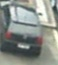

In [150]:
frame = cv2.imread('/content/2012-12-11_17_01_09#016.jpg')
#cv2_imshow(frame)
plt.imshow(frame)
plt.show()